## Old Dataset(Staircase) 

In [1]:

# coding: utf-8
import pandas as pd
import numpy as np

data = pd.read_csv('jury_data.csv', encoding= 'ISO-8859-1', skiprows=[0,2])
data.rename(columns={"Was defendant Mesa Management negligent?": "Mesa_Negligent", 
                         "Was Mesa Management's negligence a substantial factor in causing harm to  Mackenzie Dunn?":"Liability",
                         "What are the total damages that you find that MacKenzie Dunn sufferered?":"damages" ,
                         "What is your sex?": "gender",
                         "Please write your answer to the preceding damages question in words (quality check).":"damages_word",
                         "What percentage of responsibility for Mackenzie Dunn's injuries was each party responsible for? (Answers should add up to 100%) - Mesa Management Co":"Mesa_reponsible_percentage",
                         "Path":"Scenario",
                         "Was MacKenzie Dunn negligent?":"Dunn_negligent",
                         "Unnamed: 63":"perc_calc"
                         },inplace=True)
data['mm_perc'] = np.where(data['Mesa_reponsible_percentage']>=1, data['perc_calc'], data['Mesa_reponsible_percentage'])
req_data = pd.DataFrame(data[["Mesa_Negligent","damages","Liability",
                 "gender",
                 "damages_word",
                 "Scenario","Dunn_negligent","perc_calc","Start Date","End Date","mm_perc"]])


req_data['Liability'] = req_data['Liability'].map({'Yes': 1, 'No': 0})


print(req_data.columns)



print(pd.isnull(req_data).any())
print(pd.isnull(req_data['Scenario']).any())
req_data = req_data[np.isfinite(data['Scenario'])]
print(pd.isnull(req_data['Scenario']).any())
req_data['damages'].fillna(0,inplace=True)
req_data['damages_word'].fillna(0,inplace=True)
req_data['mm_perc'].fillna(1,inplace=True)
req_data['perc_calc'].fillna(0,inplace=True)
#Dropping the last two rows which has null values
#data[pd.isnull(data['Path'])]
#data['Path']=data.Path.dropna(inplace= True)
#data[pd.isnull(data['Path'])]
print(pd.isnull(req_data).any())




#Changing data types of columns
req_data['End Date'] = pd.to_datetime(data['End Date'])
req_data['Start Date'] = pd.to_datetime(data['Start Date'])
req_data['Scenario']= req_data.Scenario.astype(int)
req_data['Liability']= req_data.Liability.astype(int)
req_data.dtypes





# Getting the id of the column
data.columns.get_loc("Liability")










Index(['Mesa_Negligent', 'damages', 'Liability', 'gender', 'damages_word',
       'Scenario', 'Dunn_negligent', 'perc_calc', 'Start Date', 'End Date',
       'mm_perc'],
      dtype='object')
Mesa_Negligent     True
damages            True
Liability          True
gender             True
damages_word       True
Scenario           True
Dunn_negligent     True
perc_calc          True
Start Date        False
End Date          False
mm_perc            True
dtype: bool
True
False
Mesa_Negligent    False
damages           False
Liability         False
gender            False
damages_word      False
Scenario          False
Dunn_negligent     True
perc_calc         False
Start Date        False
End Date          False
mm_perc           False
dtype: bool


55

In [2]:
#Cleaning Damages and perc_calc column
print(req_data.isnull().any())
req_data['damages'] = req_data['damages'].str.replace(',', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace('$', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace(',', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace('-', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace("  ", '')
req_data['mm_perc'] = req_data['mm_perc'].str.replace("$", '')
req_data['mm_perc'] = req_data['mm_perc'].str.replace(",", '')
req_data['mm_perc'] = req_data['mm_perc'].str.replace("  ", '')
#req_data.damages=pd.to_numeric(req_data['damages'].str.replace(',', ''))
#req_data.perc_calc=pd.to_numeric(req_data.perc_calc)
#print(req_data.isnull().any())




req_data.damages=pd.to_numeric(req_data['damages'])
req_data.perc_calc=pd.to_numeric(req_data.perc_calc)
req_data['damages'].fillna(0,inplace=True)  
req_data['mm_perc'].fillna(1,inplace=True)
req_data['perc_calc'].fillna(0,inplace=True)
#print(req_data.damages)
print(req_data.isnull().any())





print(req_data[pd.isnull(req_data['Dunn_negligent'])])














Mesa_Negligent    False
damages           False
Liability         False
gender            False
damages_word      False
Scenario          False
Dunn_negligent     True
perc_calc         False
Start Date        False
End Date          False
mm_perc           False
dtype: bool
Mesa_Negligent    False
damages           False
Liability         False
gender            False
damages_word      False
Scenario          False
Dunn_negligent     True
perc_calc         False
Start Date        False
End Date          False
mm_perc           False
dtype: bool
    Mesa_Negligent  damages  Liability  gender damages_word  Scenario  \
0               No      0.0          0  Female            0         1   
1               No      0.0          0    Male            0         1   
2               No      0.0          0    Male            0         1   
3               No      0.0          0    Male            0         1   
4               No      0.0          0    Male            0         1   
5         

In [3]:
#EDA





req_data['winrate_percentage']=req_data.Liability
req_data['damages_mean']=req_data.damages+req_data.perc_calc
req_data['damages_median']=req_data.damages
req_data['damages_sd']=req_data.damages

winrate_damages_expected=req_data.groupby('Scenario').aggregate(
    {'winrate_percentage': np.mean, 'damages_mean': np.mean,'damages_median':np.median,'damages_sd':np.std})


winrate_damages_expected

,winrate_percentage,damages_mean,damages_median,damages_sd
Scenario,,,,
1,0.472637,86726.368159,0.0,103468.323799
2,0.487310,89847.715736,0.0,102895.999731
3,0.688172,125663.978495,105000.0,109965.448888
4,0.602941,111214.852941,100000.0,106675.801852
5,0.575916,96426.701571,90000.0,100404.383527


In [4]:

#req_data['winrate_percentage']=np.mean(req_data.Juror_Response)
#print(req_data)
req_data['mm_perc'].fillna(1,inplace=True)
req_data['damages_mean1']=req_data.damages*pd.to_numeric(req_data.mm_perc)
req_data['damages_median1']=req_data.damages
req_data['damages_sd1']=req_data.damages
#print(req_data.mm_perc)

winrate_damages_plaintiffwin=req_data.loc[(req_data['Dunn_negligent']=='No') & (req_data['Liability']==1)].groupby('Scenario').aggregate({'damages_mean1': np.mean,'damages_median1':np.median,'damages_sd1':np.std})


winrate_damages_plaintiffwin

,damages_mean1,damages_median1,damages_sd1
Scenario,,,
1,185125.000000,180000.0,78852.429869
2,177743.902439,160000.0,72767.821367
3,186972.477064,180000.0,80274.466527
4,189429.906542,180000.0,73657.559546
5,173118.279570,150000.0,78781.184228


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.factorplot(x='Scenario', y='damages', kind='box',data=req_data)



Liability,0,1
Scenario,,
1,106,95
2,101,96
3,58,128
4,81,123
5,81,110


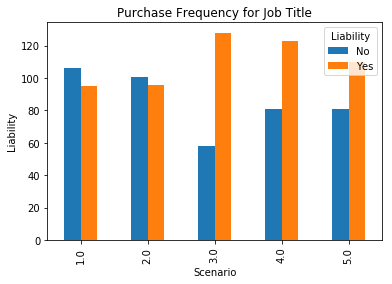

In [6]:
pd.crosstab(data.Scenario,data.Liability).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Scenario')
plt.ylabel('Liability')
plt.savefig('Juror Response per each Scenario')





a = req_data['Scenario']
b = req_data['Liability']
pd.crosstab(a,b)

## New Dataset(Snowboard) 

In [7]:
import pandas as pd
df =pd.read_csv('Low_Anchor.tsv', sep='\t+',skiprows=[0,2, 4]+list(range(1,1614,2)) + [1614], names = ['StartDate', 'EndDate',
       'ResponseType', 
       'IP Address', 
       'Progress', 
       'Duration',
       'Finished',
       'RecordedDate',
       'ResponseID', 
       'RecipientLastName','RecipientFirstName','RecipientEmail',
       'ExternalDataReference','LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Participation_in_this_project.',
       'Browser Meta Info - Browser',
       'Browser Meta Info - Version',
       'Browser Meta Info - Operating System',
       'Browser Meta Info - Resolution',
       'What number did you hear?',
       'What word did you see?',
       'What is your sex?',
       'How old are you?',
       'Which of the following best describes your ethnicity?',
       'Are you Spanish/Hispanic/Latino',
       'What is the highest degree or level of school you have completed?',
       'This is an attention check.  Select 200.',
       'Which of the following best describes your total household income?',
       'Where would you place yourself on this scale?',
       'What is your zip code?',
       'Timing - First Click','Timing - Last Click','Timing - Page Submit', 'Timing - Click Count',
       'Timing - First Click.1', 'Timing - Last Click.1', 'Timing - Page Submit.1',
       'Timing - Click Count.1', 'Timing - First Click.2','Timing - Last Click.2',
       'Timing - Page Submit.2','Timing - Click Count.2','Timing - First Click.3','Timing - Last Click.3',
       'Timing - Page Submit.3','Timing - Click Count.3','Timing - First Click.4', 'Timing - Last Click.4',
       'Timing - Page Submit.4','Timing - Click Count.4', 'Timing - First Click.5', 'Timing - Last Click.5',
       'Timing - Page Submit.5','Timing - Click Count.5', 'Timing - First Click.6', 'Timing - Last Click.6',
       'Timing - Page Submit.6',  'Timing - Click Count.6', 'Timing - First Click.7','Timing - Last Click.7',
       'Timing - Page Submit.7',  'Timing - Click Count.7',
       'Identify the statement that correctly describes the facts of this case. (This is the attention check)',
       'Was_snowboard_sold_McNeil_defective_14', ## using this
       "Is_substantial_factor_McNeil_injuries_14",
       'Non_economic_damages_McNeil_suffered_14',
       'Damages_words_14',
       'Was_McNeil_negligent',
       'McNeil_negligence_substantial_factor_for_injuries',
       'Percentage_of_responsibility_X5',
       'Percentage_of_responsibility_McNeil',
       'Was_snowboard_sold_McNeil_defective_58',
       "Is_substantial_factor_McNeil_injuries_58",
       'Economic_damages_McNeil_suffer_58',
       'Economic_Damages_In_Word_58',
       'Non_economic_damages_McNeil_suffered_58',
       'Non_Economic_Damages_In_Word_58',
       'Please explain why you arrived at your decision? (50 character minimum)',
       'Q40',#'Did the fact that X5 added core inserts to the later Carve 3000 model, affect your view as to whether the original Carve 3000 was defective?',
       'Were you able to ignore the  fact that X5 added core inserts to the later Carve 3000 model when deciding whether the original Carve 3000 was defective?',
       'Path'])
        
df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,StartDate,EndDate,ResponseType,IP Address,Progress,Duration,Finished,RecordedDate,ResponseID,RecipientLastName,...,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Economic_Damages_In_Word_58,Non_economic_damages_McNeil_suffered_58,Non_Economic_Damages_In_Word_58,Please explain why you arrived at your decision? (50 character minimum),Q40,Were you able to ignore the fact that X5 added core inserts to the later Carve 3000 model when deciding whether the original Carve 3000 was defective?,Path
0, 4 / 6 / 1 8   1 3 : 1 4 , 4 / 6 / 1 8   1 3 : 1 5 , 0 , 7 6 . 8 4 . 2 5 0 . 1 4 3 , 1 0 0 , 3 4 , 1 , 4 / 6 / 1 8   1 3 : 1 5 , R _ 2 V e D w 6 k P p O 7 N X v z , ,..., , , , , , , , , , 
1, 4 / 6 / 1 8   1 3 : 1 5 , 4 / 6 / 1 8   1 3 : 1 6 , 0 , 1 0 7 . 1 4 0 . 1 9 1 . 1 7 6 , 1 0 0 , 4 2 , 1 , 4 / 6 / 1 8   1 3 : 1 6 , R _ 1 e J q 1 K w X T Y y a e w m , ,..., , , , , , , , , , 
2, 4 / 6 / 1 8   1 3 : 1 7 , 4 / 6 / 1 8   1 3 : 1 8 , 0 , 1 3 8 . 2 0 7 . 1 6 8 . 1 4 8 , 1 0 0 , 6 0 , 1 , 4 / 6 / 1 8   1 3 : 1 8 , R _ 2 q l Q Q Y 4 F U r K Y e y z , ,..., , , , , , , , , , 6 
3, 4 / 6 / 1 8   1 3 : 1 7 , 4 / 6 / 1 8   1 3 : 1 8 , 0 , 7 2 . 1 9 8 . 7 4 . 1 3 5 , 1 0 0 , 6 9 , 1 , 4 / 6 / 1 8   1 3 : 1 8 , R _ 1 l m Z b A x g O 0 A P U 5 T , ,..., , , , , , , , , , 
4, 4 / 6 / 1 8   1 3 : 1 4 , 4 / 6 / 1 8   1 3 : 1 9 , 0 , 1 0 7 . 7 7 . 2 0 9 . 4 2 , 1 0 0 , 2 5 5 , 1 , 4 / 6 / 1 8   1 3 : 1 9 , R _ 1 n O b S X p L 5 d 0 w f Q S , ,..., , , , , , , , , , 7 


In [8]:
df.dtypes

StartDate                                                                                                                                                  object
EndDate                                                                                                                                                    object
ResponseType                                                                                                                                               object
IP Address                                                                                                                                                 object
Progress                                                                                                                                                   object
Duration                                                                                                                                                   object
Finished                    

In [9]:
## replacing hexadecimal value of damages'/x00' to ''
for i in range(len(df)):
    df['Was_snowboard_sold_McNeil_defective_14'].values[i] = df['Was_snowboard_sold_McNeil_defective_14'].values[i].replace('\x00','')
    df['Is_substantial_factor_McNeil_injuries_14'].values[i] = df['Is_substantial_factor_McNeil_injuries_14'].values[i].replace('\x00','')
    df['Non_economic_damages_McNeil_suffered_14'].values[i] = df['Non_economic_damages_McNeil_suffered_14'].values[i].replace('\x00','')
    df['Damages_words_14'].values[i] = df['Damages_words_14'].values[i].replace('\x00','')
    df['Was_McNeil_negligent'].values[i] = df['Was_McNeil_negligent'].values[i].replace('\x00','') ;
    df['McNeil_negligence_substantial_factor_for_injuries'].values[i] = df['McNeil_negligence_substantial_factor_for_injuries'].values[i].replace('\x00','') ;
    df['Percentage_of_responsibility_X5'].values[i] = df['Percentage_of_responsibility_X5'].values[i].replace('\x00','') ;
    df['Percentage_of_responsibility_McNeil'].values[i] = df['Percentage_of_responsibility_McNeil'].values[i].replace('\x00','') ;
    df['Was_snowboard_sold_McNeil_defective_58'].values[i] = df['Was_snowboard_sold_McNeil_defective_58'].values[i].replace('\x00','') ;
    df['Is_substantial_factor_McNeil_injuries_58'].values[i] = df['Is_substantial_factor_McNeil_injuries_58'].values[i].replace('\x00','') ;
    df['Economic_damages_McNeil_suffer_58'].values[i] = df['Economic_damages_McNeil_suffer_58'].values[i].replace('\x00','') ;
    df['Economic_Damages_In_Word_58'].values[i] = df['Economic_Damages_In_Word_58'].values[i].replace('\x00','') ;
    df['Non_economic_damages_McNeil_suffered_58'].values[i] = df['Non_economic_damages_McNeil_suffered_58'].values[i].replace('\x00','') ;
    df['Non_Economic_Damages_In_Word_58'].values[i] = df['Non_Economic_Damages_In_Word_58'].values[i].replace('\x00','') ;
    df['Path'].values[i] = df['Path'].values[i].replace('\x00','') ;  
    df['Q40'].values[i] = df['Q40'].values[i].replace('\x00','') ; 
    #df['Was the Carve 3000 snowboard X5 sold Connor McNeil defective?'].values[i] =  df['Was the Carve 3000 snowboard X5 sold Connor McNeil defective?'].values[i].replace('\x00','') ;  

In [10]:
## Changing Data type
df.StartDate = pd.to_datetime(df.StartDate)
df.EndDate   = pd.to_datetime(df.EndDate) 
#df.Was_snowboard_sold_McNeil_defective_14   = pd.to_numeric(df.Was_snowboard_sold_McNeil_defective_14)
df.Is_substantial_factor_McNeil_injuries_14 = pd.to_numeric(df.Is_substantial_factor_McNeil_injuries_14)
df.Non_economic_damages_McNeil_suffered_14  = pd.to_numeric(df.Non_economic_damages_McNeil_suffered_14)
df.Was_McNeil_negligent                     = pd.to_numeric(df.Was_McNeil_negligent)
df.McNeil_negligence_substantial_factor_for_injuries= pd.to_numeric(df.McNeil_negligence_substantial_factor_for_injuries)
df.Percentage_of_responsibility_X5          = pd.to_numeric(df.Percentage_of_responsibility_X5)
df.Percentage_of_responsibility_McNeil      = pd.to_numeric(df.Percentage_of_responsibility_McNeil)
#df.Was_snowboard_sold_McNeil_defective_58   = pd.to_numeric(df.Was_snowboard_sold_McNeil_defective_58)
df.Is_substantial_factor_McNeil_injuries_58 = pd.to_numeric(df.Is_substantial_factor_McNeil_injuries_58)
df.Economic_damages_McNeil_suffer_58        = pd.to_numeric(df.Economic_damages_McNeil_suffer_58)
df.Non_economic_damages_McNeil_suffered_58  = pd.to_numeric(df.Non_economic_damages_McNeil_suffered_58)
df.Q40 =pd.to_numeric(df.Q40) 
# Handling for Path
df.Path = pd.to_numeric(df.Path) 
df['Path'].fillna(0,inplace = True)
df.Path =  df.Path.astype(int)
df.dtypes

StartDate                                                                                                                                                  datetime64[ns]
EndDate                                                                                                                                                    datetime64[ns]
ResponseType                                                                                                                                                       object
IP Address                                                                                                                                                         object
Progress                                                                                                                                                           object
Duration                                                                                                                                              

# Extracting the required columns and storing it in "newdf" data frame.

In [11]:
newdf =pd.DataFrame(df[['StartDate', 'EndDate',
       'Was_snowboard_sold_McNeil_defective_14', 
       "Is_substantial_factor_McNeil_injuries_14",
       'Non_economic_damages_McNeil_suffered_14',                                                                                         
       'Was_McNeil_negligent',
       'McNeil_negligence_substantial_factor_for_injuries',                                                                                         
       'Percentage_of_responsibility_X5',
       'Percentage_of_responsibility_McNeil'                                                                                      ,
       'Was_snowboard_sold_McNeil_defective_58',
       "Is_substantial_factor_McNeil_injuries_58",
       'Economic_damages_McNeil_suffer_58',
       'Non_economic_damages_McNeil_suffered_58',
       'Q40',
       'Path']])
        
##newdf.head(5)
newdf.sample(5)

,StartDate,EndDate,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Path
105,2018-04-06 13:34:00,2018-04-06 13:38:00,4,5.0,450000.0,1.0,1.0,75.0,25.0,,NaN,NaN,NaN,1.0,4
397,2018-04-06 13:21:00,2018-04-06 13:48:00,,NaN,NaN,NaN,NaN,NaN,NaN,4,6.0,NaN,NaN,2.0,5
590,2018-04-06 13:27:00,2018-04-06 13:58:00,,NaN,NaN,2.0,2.0,NaN,NaN,4,5.0,490000.0,1000.0,2.0,7
162,2018-04-06 13:19:00,2018-04-06 13:39:00,,NaN,NaN,2.0,2.0,NaN,NaN,4,5.0,10000.0,49000.0,2.0,5
173,2018-04-06 13:19:00,2018-04-06 13:40:00,6,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,3.0,2


## See how many missing data points we have

#### Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [12]:
import numpy as np

missing_values_count = newdf.isnull().sum()

print(missing_values_count)

total_cells = np.product(newdf.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

StartDate                                              0
EndDate                                                0
Was_snowboard_sold_McNeil_defective_14                 0
Is_substantial_factor_McNeil_injuries_14             618
Non_economic_damages_McNeil_suffered_14              637
Was_McNeil_negligent                                 489
McNeil_negligence_substantial_factor_for_injuries    489
Percentage_of_responsibility_X5                      679
Percentage_of_responsibility_McNeil                  679
Was_snowboard_sold_McNeil_defective_58                 0
Is_substantial_factor_McNeil_injuries_58             629
Economic_damages_McNeil_suffer_58                    656
Non_economic_damages_McNeil_suffered_58              656
Q40                                                   33
Path                                                   0
dtype: int64


46.14427860696517

In [13]:
#newdf.isnull().sum()
newdf.shape

(804, 15)

### As we are just working on from path 1 to 8, Lets remove path with value 0.

In [14]:
newdf[newdf.Path <=0]

,StartDate,EndDate,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Path
0,2018-04-06 13:14:00,2018-04-06 13:15:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0
1,2018-04-06 13:15:00,2018-04-06 13:16:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0
3,2018-04-06 13:17:00,2018-04-06 13:18:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0
5,2018-04-06 13:19:00,2018-04-06 13:19:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0
6,2018-04-06 13:17:00,2018-04-06 13:20:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0
7,2018-04-06 13:16:00,2018-04-06 13:20:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0
10,2018-04-06 13:23:00,2018-04-06 13:24:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0
16,2018-04-06 13:26:00,2018-04-06 13:27:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0
20,2018-04-06 13:19:00,2018-04-06 13:29:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0
21,2018-04-06 13:29:00,2018-04-06 13:30:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0


In [15]:
newdf[newdf.Path <=0].shape

(13, 15)

<font color = 'red' size = "5"> As we can see there are 13 observation with path value equal to 0. We are removing these observation </font>

In [16]:
# removed path with 0 values 
newdf = newdf[newdf.Path > 0]

## Replacing the Null Values with empty string(Easy to convert to other datatypes Later)

In [17]:

print(pd.isnull(newdf).any())
newdf = newdf[np.isfinite(newdf['Path'])]
newdf['Is_substantial_factor_McNeil_injuries_14'].fillna("",inplace=True)
newdf['Non_economic_damages_McNeil_suffered_14'].fillna("",inplace=True)
newdf['Was_McNeil_negligent'].fillna("",inplace=True)
newdf['McNeil_negligence_substantial_factor_for_injuries'].fillna("",inplace=True)
newdf['Percentage_of_responsibility_X5'].fillna("",inplace=True)
newdf['Percentage_of_responsibility_McNeil'].fillna("",inplace=True)
newdf['Was_snowboard_sold_McNeil_defective_58'].fillna("",inplace=True)
newdf['Is_substantial_factor_McNeil_injuries_58'].fillna("",inplace=True)
newdf['Economic_damages_McNeil_suffer_58'].fillna("",inplace=True)
newdf['Non_economic_damages_McNeil_suffered_58'].fillna("",inplace=True)
newdf['Q40'].fillna("",inplace=True)
# Printing the first 5 lines.
newdf.head(5)

StartDate                                            False
EndDate                                              False
Was_snowboard_sold_McNeil_defective_14               False
Is_substantial_factor_McNeil_injuries_14              True
Non_economic_damages_McNeil_suffered_14               True
Was_McNeil_negligent                                  True
McNeil_negligence_substantial_factor_for_injuries     True
Percentage_of_responsibility_X5                       True
Percentage_of_responsibility_McNeil                   True
Was_snowboard_sold_McNeil_defective_58               False
Is_substantial_factor_McNeil_injuries_58              True
Economic_damages_McNeil_suffer_58                     True
Non_economic_damages_McNeil_suffered_58               True
Q40                                                   True
Path                                                 False
dtype: bool


,StartDate,EndDate,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Path
2,2018-04-06 13:17:00,2018-04-06 13:18:00,,,,,,,,,,,,,6
4,2018-04-06 13:14:00,2018-04-06 13:19:00,,,,,,,,,,,,,7
8,2018-04-06 13:17:00,2018-04-06 13:21:00,4,5,200000,1,1,50,50,,,,,2,3
9,2018-04-06 13:18:00,2018-04-06 13:21:00,4,5,35000,1,1,65,35,,,,,1,2
11,2018-04-06 13:19:00,2018-04-06 13:25:00,,,,,,,,6,,,,3,6


### Changing datatype of damages and filling NULL values with 0s.

As per the requirement we have to calculate the Total Damages for each path.
There are 8 different Paths. 

- Path 1 2 3 4 : Scenarios with no Low Anchor. 
- Path 5 6 7 8 : Scenarios with Low Anchor. 

As we are not taking consideration of Low Anchor,we renamed Path 5,6,7,8 as 1,2,3,4 respectively. 

Later we converted the data type of Path as "Int".

In [18]:
newdf['Path'].replace([5, 6 ,7,8], [1,2,3,4], inplace = True)
newdf['Path']= newdf.Path.astype(int)

<font color='red'>We need to change the data type of damages. There are 3 different columns that have the damages 
information. From previous data type check, we found that there are so many missing values for damages.
So we replaced them with 0.
</font>

For simplicity to plot Path vs damages we combined all damages into one column and named it 
as "Total_Damages". 

In [19]:
newdf.Economic_damages_McNeil_suffer_58        = pd.to_numeric(newdf.Economic_damages_McNeil_suffer_58)
newdf.Non_economic_damages_McNeil_suffered_58  = pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_58)
newdf.Non_economic_damages_McNeil_suffered_14  = pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14) 


## Plot of Path vs Economic Damages.

#### We have economic damages only from Path 5 to 8, so ploting the graph for the same.

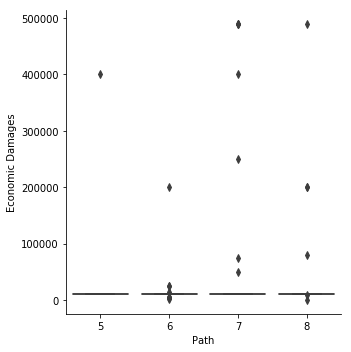

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
newdf58 = df[df.Path>4]
plt = sns.factorplot(x='Path', y='Economic_damages_McNeil_suffer_58', kind='box',data=newdf58, size=5)
_ = plt.set(xlabel='Path', ylabel='Economic Damages')

## Plot of Path(5 to 8) vs Non Economic Damages.

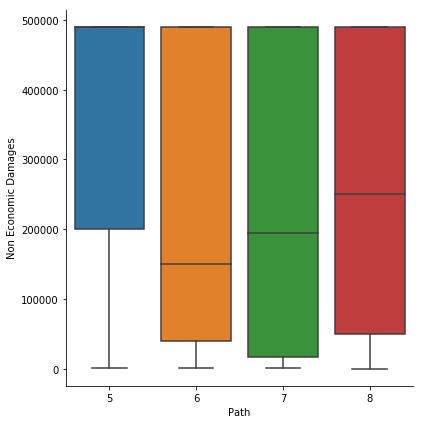

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt1 = sns.factorplot(x='Path', y='Non_economic_damages_McNeil_suffered_58', kind='box',data=newdf58, size=6)
_ = plt1.set(xlabel='Path', ylabel='Non Economic Damages')

## Plot of Path(1 to 4) vs Non Economic Damages.

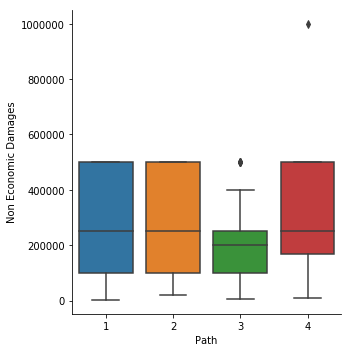

In [22]:
plt2 = sns.factorplot(x='Path', y='Non_economic_damages_McNeil_suffered_14', kind='box',data=newdf, size=5)
_ = plt2.set(xlabel='Path', ylabel='Non Economic Damages')

In [23]:
#create new column for non economic damages(for path 1 to 4 and path 5 to 8--do boxplot)

Before Filling the NaN values with 0, first lets check if any juror has put 0 intentionally

In [24]:
newdf.query('Non_economic_damages_McNeil_suffered_14 == 0 | Non_economic_damages_McNeil_suffered_58 == 0 |Economic_damages_McNeil_suffer_58 ==0')

,StartDate,EndDate,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Path
246,2018-04-06 13:19:00,2018-04-06 13:42:00,,,NaN,2,2,,,4,5,490000.0,0.0,1,4


<font color='red'> We found that one row has 0 value for Non_economic damages McNeil suffered. 
</font>

In [25]:
newdf.Economic_damages_McNeil_suffer_58.fillna(0, inplace = True)
newdf.Non_economic_damages_McNeil_suffered_58.fillna(0, inplace = True)
newdf.Non_economic_damages_McNeil_suffered_14.fillna(0, inplace = True)

newdf['Total_Damages'] =  newdf['Economic_damages_McNeil_suffer_58']+newdf['Non_economic_damages_McNeil_suffered_58'] + newdf['Non_economic_damages_McNeil_suffered_14']

# Box Plot for Total Damages vs Path.

We used Violin Plot because it allows a deeper understanding of the density. 

In [26]:
(newdf.Total_Damages==0).sum()

476

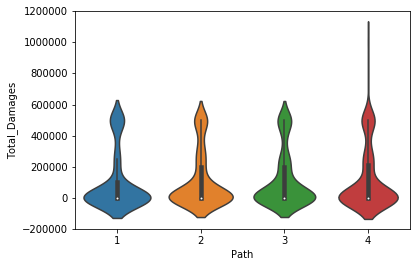

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.axes as p


newdf["Path"] = newdf.Path.astype('category')
#_=sns.factorplot(x='Path', y='Total_Damages', kind='violin',data=newdf, size=5)#.set(ylim=0)
#sns.factorplot(x='Path', y='Total_Damages',kind='violin',data=newdf, size=5)#.fit_kde

sns.violinplot(x="Path", y="Total_Damages", data=newdf, inner = 'box')

# Note: This happens because to calculate the lowest whisker you use : 
#The values for Q1 – 1.5×IQR are the "fences" that mark off the "reasonable" 
# values from the outlier values.  gaussian_kde works for both uni-variate and multi-variate data. 
# It includes automatic bandwidth determination.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
   

From the box plot, we can see there are some outlier for Path 1 and 4. Lets find what are the outliers are.
For Path column in newdf, we can get 0.99 quantile and then we printed the rows having outlier.

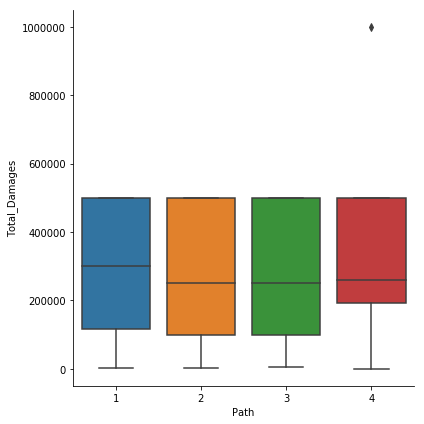

In [28]:
damage_df = newdf[newdf.Total_Damages >0]
sns.factorplot(x='Path', y='Total_Damages', kind='box',data=damage_df, size=6)

**based on above boxplot path 4 has an outlier value around 1000000. Hence we will remove this value**

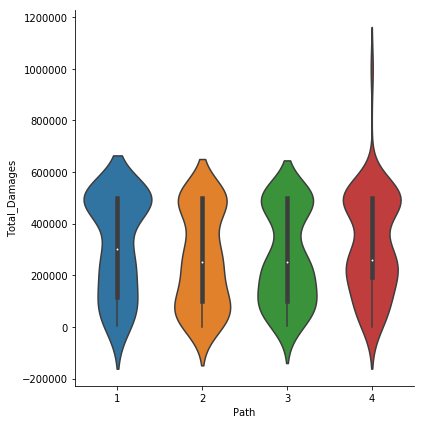

In [29]:
sns.factorplot(x='Path', y='Total_Damages', kind='violin',data=damage_df, size=6)

In [30]:
q = newdf["Total_Damages"].quantile(0.99)
print(q)
newdf.query("Total_Damages >= 500000")

500000.0


,StartDate,EndDate,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Path,Total_Damages
27,2018-04-06 13:15:00,2018-04-06 13:33:00,4,5,500000.0,2,2,,,,,0.0,0.0,1,1,500000.0
56,2018-04-06 13:14:00,2018-04-06 13:36:00,4,5,500000.0,2,2,,,,,0.0,0.0,1,4,500000.0
60,2018-04-06 13:15:00,2018-04-06 13:36:00,,,0.0,1,1,50,50,4,5,10000.0,490000.0,1,1,500000.0
83,2018-04-06 13:29:00,2018-04-06 13:37:00,4,5,500000.0,2,2,,,,,0.0,0.0,3,3,500000.0
84,2018-04-06 13:14:00,2018-04-06 13:37:00,4,5,500000.0,2,2,,,,,0.0,0.0,3,4,500000.0
87,2018-04-06 13:16:00,2018-04-06 13:37:00,,,0.0,2,2,,,4,5,10000.0,490000.0,2,4,500000.0
114,2018-04-06 13:16:00,2018-04-06 13:38:00,,,0.0,2,2,,,4,5,10000.0,490000.0,2,3,500000.0
116,2018-04-06 13:16:00,2018-04-06 13:38:00,,,0.0,2,2,,,4,5,10000.0,490000.0,1,4,500000.0
123,2018-04-06 13:16:00,2018-04-06 13:38:00,,,0.0,2,2,,,4,5,10000.0,490000.0,3,4,500000.0
124,2018-04-06 13:18:00,2018-04-06 13:39:00,,,0.0,2,2,,,4,5,10000.0,490000.0,1,2,500000.0


So Lets remove the outlier and plot the box plot again.

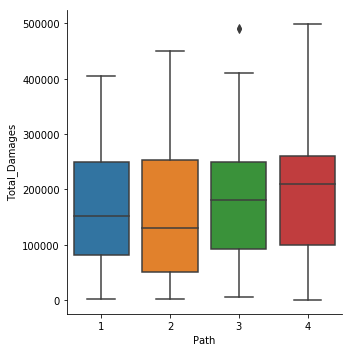

In [31]:
newdf1 = newdf[(newdf.Total_Damages < q) & (newdf.Total_Damages >0) ]
sns.factorplot(x='Path', y='Total_Damages', kind='box',data=newdf1, size=5)

In [32]:
newdf['Liability'] = newdf['Was_snowboard_sold_McNeil_defective_14'] + newdf['Was_snowboard_sold_McNeil_defective_58']


For graph we are changing the value 4 and 6 to Yes and No. Liability with blank is replace with "No Reponse"

In [33]:
newdf['Liability'].replace(['4', '6' , ''], ['Yes','No', 'No Reponse'], inplace = True)

In [34]:
## Cleaning data(checking if any column has null values)
newdf.isnull().any()

StartDate                                            False
EndDate                                              False
Was_snowboard_sold_McNeil_defective_14               False
Is_substantial_factor_McNeil_injuries_14             False
Non_economic_damages_McNeil_suffered_14              False
Was_McNeil_negligent                                 False
McNeil_negligence_substantial_factor_for_injuries    False
Percentage_of_responsibility_X5                      False
Percentage_of_responsibility_McNeil                  False
Was_snowboard_sold_McNeil_defective_58               False
Is_substantial_factor_McNeil_injuries_58             False
Economic_damages_McNeil_suffer_58                    False
Non_economic_damages_McNeil_suffered_58              False
Q40                                                  False
Path                                                 False
Total_Damages                                        False
Liability                                            Fal

## Graph showing the responses of jurors for each path

Liability,No,No Reponse,Yes
Path,,,
1,109,6,78
2,99,5,97
3,99,3,103
4,103,6,83


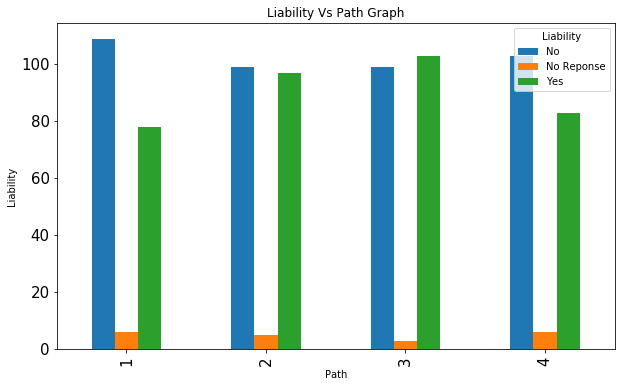

In [35]:
## Plot Juror Responce vs Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


pd.crosstab(newdf.Path,newdf.Liability).plot(kind='bar', fontsize = 15, figsize=(10,6))
plt.title('Liability Vs Path Graph')
plt.xlabel('Path')
plt.ylabel('Liability')
plt.savefig('Juror Response vs Path')

a = newdf['Path']
b = newdf['Liability']
pd.crosstab(a,b)

In [36]:
## Finding winrate percentage for each path 
ratedf=pd.DataFrame(newdf[['Liability','Path','Was_McNeil_negligent']])
ratedf['winrate_percentage']=ratedf.Liability

## Finding the Winrate, Expected Damages, mean , median and SD

In [37]:

ratedf['winrate_percentage']=newdf.Liability
ratedf['damages_mean']=pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14) + pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_58) 
ratedf['damages_median']=pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14 )+pd.to_numeric( newdf.Non_economic_damages_McNeil_suffered_58) 
ratedf['damages_sd']=pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14) + pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_58)
ratedf['winrate_percentage'] = ratedf['winrate_percentage'].map({"Yes":1, "No":0})

winrate_damages_expected=ratedf.groupby('Path').aggregate(
    {'winrate_percentage': np.mean
     ,'damages_mean': np.mean
     ,'damages_median':np.median
     ,'damages_sd':np.std
    })

winrate_damages_expected

,winrate_percentage,damages_mean,damages_median,damages_sd
Path,,,,
1,0.417112,100735.699482,0.0,181063.194368
2,0.494898,111415.422886,0.0,175733.229103
3,0.509901,105321.951220,0.0,169067.435658
4,0.446237,112500.026042,0.0,189577.911915


## Finding the Damages, mean , median and SD when plaintiff wins.

In [38]:

winrate_damages_plaintiffwin = ratedf.loc[(ratedf['Was_McNeil_negligent']== 1) & (ratedf['Liability']=='Yes')].groupby('Path').aggregate(
    {'damages_mean': np.mean
     ,'damages_median':np.median
     ,'damages_sd':np.std
    })
winrate_damages_plaintiffwin

,damages_mean,damages_median,damages_sd
Path,,,
1,263374.687500,250000.0,187269.191927
2,217755.102041,150000.0,187308.405512
3,200714.285714,150000.0,166498.873870
4,243750.156250,250000.0,169781.411890


## Answering to the question.



<font color = red>
With respect to the first question, I realize that answers from participants in versions 1 and 5 are meaningless.  They did not see evidence of added core inserts. As far as the analysis, I think we want to see if this answer predicted how people responded to the liability questions. For example, did people that said "Yes this evidence strongly suggested the Carve 3000 was defective” find liability more often than people that answered “No”. 
</font>

Here Q40 is "Did the fact that X5 added core inserts to the later Carve 3000 model, affect your view as to whether the original Carve 3000 was defective?"

The Values are: 
- 1 = Yes, it strongly suggested that the original Carve 3000 was defective.
- 2 = Yes, it somewhat suggested that the original Carve 3000 was defective.
- 3 = No, it did not suggest that the original Carve 3000 was defective.

So first lets check the brief summary table for each scenarios.

In [39]:
a = newdf['Q40'].replace([1.0,2.0,3.0], ['Yes','Maybe','No'])
a = a[a.apply(len) > 0]
b = newdf['Liability']
pd.crosstab([df.Path,b], a)

Q40             Maybe  No  Yes
Path Liability                
1    No             3  46    0
     Yes           19  13   11
2    No             5  47    0
     Yes           23   7   19
3    No             3  41    0
     Yes           25  19   11
4    No             3  51    0
     Yes           15  15    9
5    No             6  54    0
     Yes           17   9    9
6    No             1  46    0
     Yes           16   7   25
7    No             7  48    0
     Yes           24  14   10
8    No             3  46    0
     Yes           20  14   10

## Observation 

- Among 54 Juror who <font color = 'red'>Strongly</font> supported the  that the fact that the original Carve 3000 was defective, 50 said Yes for Liability. 

- Among 238 Juror who said No to question 40, 185 said No for Liability i:e <font color = red> No for "Was the Carve 3000  snowboard X5 sold Connor McNeil defective?" </font> and 54 Juror said 'Yes' for Liability. 

#### Below is the plot for Path 1 and 5

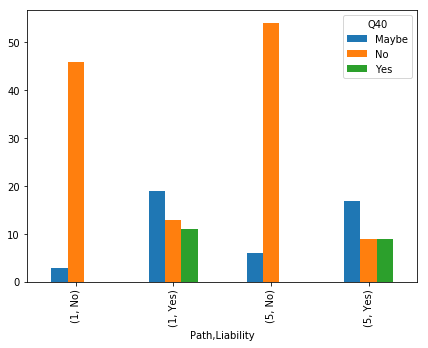

In [40]:
newdf15 = df[(df.Path == 1)| (df.Path == 5)]
_ = pd.crosstab([newdf15.Path,b], a).plot(kind='bar', fontsize = 10, figsize=(7,5))

## Question 2:

With respect to the 2nd questions, again answers from participants in versions 1,2 and 5 and 6  are meaningless. They did not receive the jury instruction telling them to ignore the evidence.  Again, we should do the same analysis as above. Do people that say they can ignore the evidence have lower liability verdicts than people that say they cannot ignore the evidence (for the remaining scenarios 3-4 and 7-8).

.

<font color = red>Q41: 'Were you able to ignore the  fact that X5 added core inserts to the later Carve 3000 model when deciding whether the original Carve 3000 was defective?'</font>

### Plot for Path 3, 4 , 7 and 8

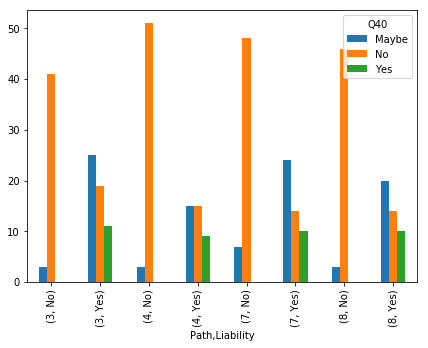

In [41]:
newdf3478 = df[(df.Path == 3)| (df.Path == 4)|(df.Path == 7)| (df.Path == 8)]
_ = pd.crosstab([newdf3478.Path,b], a).plot(kind='bar', fontsize = 10, figsize=(7,5))  

In [42]:
newdf.columns
newdf1=pd.DataFrame(newdf[["StartDate","EndDate","Liability",'Total_Damages','Path','Was_McNeil_negligent']])
newdf1

,StartDate,EndDate,Liability,Total_Damages,Path,Was_McNeil_negligent
2,2018-04-06 13:17:00,2018-04-06 13:18:00,No Reponse,0.0,2,
4,2018-04-06 13:14:00,2018-04-06 13:19:00,No Reponse,0.0,3,
8,2018-04-06 13:17:00,2018-04-06 13:21:00,Yes,200000.0,3,1
9,2018-04-06 13:18:00,2018-04-06 13:21:00,Yes,35000.0,2,1
11,2018-04-06 13:19:00,2018-04-06 13:25:00,No,0.0,2,
12,2018-04-06 13:18:00,2018-04-06 13:25:00,No Reponse,0.0,4,
13,2018-04-06 13:17:00,2018-04-06 13:26:00,Yes,35000.0,2,2
14,2018-04-06 13:23:00,2018-04-06 13:27:00,No,0.0,3,
15,2018-04-06 13:16:00,2018-04-06 13:27:00,No,0.0,4,
17,2018-04-06 13:15:00,2018-04-06 13:28:00,Yes,250000.0,3,2


In [43]:
newdf1.rename(columns={"StartDate": "Start Date", 
                         "EndDate":"End Date",
                         "Total_Damages":"damages",
                       "Was_McNeil_negligent":"Plaintiff_negligent"
                         },inplace=True)

newdf1['Plaintiff_negligent'] = newdf1['Plaintiff_negligent'].map({1:"Yes", 2:"No"})
newdf1['Liability'] = newdf1['Liability'].map({"Yes":1, "No":0})

In [44]:
req_data.columns
req_data1=pd.DataFrame(req_data[["Start Date","End Date","Liability",'damages','Scenario','perc_calc','mm_perc','Dunn_negligent']])
req_data1.rename(columns={
                       "Scenario":"Path","Dunn_negligent":"Plaintiff_negligent"
                         },inplace=True)

In [45]:
frames=[newdf1,req_data1]
merge_data = pd.concat(frames, keys=['x', 'y'])

merge_data

End Date  Liability  Path Plaintiff_negligent  \
x 2   2018-04-06 13:18:00        NaN     2                 NaN   
  4   2018-04-06 13:19:00        NaN     3                 NaN   
  8   2018-04-06 13:21:00        1.0     3                 Yes   
  9   2018-04-06 13:21:00        1.0     2                 Yes   
  11  2018-04-06 13:25:00        0.0     2                 NaN   
  12  2018-04-06 13:25:00        NaN     4                 NaN   
  13  2018-04-06 13:26:00        1.0     2                  No   
  14  2018-04-06 13:27:00        0.0     3                 NaN   
  15  2018-04-06 13:27:00        0.0     4                 NaN   
  17  2018-04-06 13:28:00        1.0     3                  No   
  18  2018-04-06 13:28:00        0.0     3                 NaN   
  19  2018-04-06 13:28:00        0.0     2                 NaN   
  22  2018-04-06 13:30:00        NaN     1                 NaN   
  23  2018-04-06 13:30:00        0.0     1                 NaN   
  24  2018-04-06 13:31:00        1.0     3                  No   
  25  2018-04-06 13:32:00        0.0     1                 NaN   
  26  2018-04-06 13:33:00        1.0     1                 NaN   
  27  2018-04-06 13:33:00        1.0     1                  No   
  28  2018-04-06 13:33:00        0.0     1                 NaN   
  29  2018-04-06 13:33:00        1.0     2                 Yes   
  30  2018-04-06 13:33:00        0.0     2                 NaN   
  31  2018-04-06 13:33:00        NaN     2                 NaN   
  32  2018-04-06 13:34:00        0.0     2                 NaN   
  33  2018-04-06 13:34:00        NaN     4                 NaN   
  34  2018-04-06 13:34:00        0.0     1                 NaN   
  35  2018-04-06 13:34:00        NaN     4                 NaN   
  36  2018-04-06 13:34:00        0.0     1                 NaN   
  37  2018-04-06 13:34:00        0.0     3                 NaN   
  38  2018-04-06 13:34:00        0.0     1                 NaN   
  39  2018-04-06 13:35:00        0.0     1                 NaN   
...                   ...        ...   ...                 ...   
y 949 2017-09-29 14:41:00        1.0     2                 Yes   
  950 2017-10-01 14:18:00        1.0     2                 Yes   
  951 2017-10-02 12:45:00        1.0     2                 Yes   
  952 2017-10-02 17:53:00        1.0     2                 Yes   
  953 2017-10-03 09:57:00        1.0     2                 Yes   
  954 2017-10-05 18:06:00        1.0     2                 Yes   
  955 2017-10-05 18:35:00        1.0     2                 Yes   
  956 2017-09-30 21:10:00        1.0     3                 Yes   
  957 2017-09-30 23:35:00        1.0     3                 Yes   
  958 2017-10-05 17:40:00        1.0     3                 Yes   
  959 2017-10-05 17:51:00        1.0     3                 Yes   
  960 2017-10-05 18:07:00        1.0     3                 Yes   
  961 2017-10-05 18:15:00        1.0     3                 Yes   
  962 2017-10-05 18:17:00        1.0     3                 Yes   
  963 2017-10-05 18:21:00        1.0     3                 Yes   
  964 2017-10-05 18:32:00        1.0     3                 Yes   
  965 2017-09-29 17:09:00        1.0     4                 Yes   
  966 2017-10-02 06:28:00        1.0     4                 Yes   
  967 2017-10-05 17:48:00        1.0     4                 Yes   
  968 2017-10-05 18:27:00        1.0     4                 Yes   
  969 2017-10-05 18:33:00        1.0     4                 Yes   
  970 2017-10-05 18:44:00        1.0     4                 Yes   
  971 2017-09-29 14:45:00        1.0     5                 Yes   
  972 2017-09-29 15:30:00        1.0     5                 Yes   
  973 2017-09-29 18:53:00        1.0     5                 Yes   
  974 2017-10-02 10:02:00        1.0     5                 Yes   
  975 2017-10-05 12:48:00        1.0     5                 Yes   
  976 2017-10-05 17:43:00        1.0     5                 Yes   
  977 2017-10-05 17:46:00        1.0     5               

Case Expected Value Damages for the merge data
Showing the total expected damages mean,median and sd with winrate percentage (entire version)



In [46]:
merge_data
merge_data['winrate_percentage']=merge_data.Liability
merge_data['damages_mean']=merge_data.damages+merge_data.perc_calc
merge_data['damages_median']=merge_data.damages
merge_data['damages_sd']=merge_data.damages



winrate_damages_expected=merge_data.groupby('Path').aggregate(
    {'winrate_percentage': np.mean, 'damages_mean': np.mean,'damages_median':np.median,'damages_sd':np.std})


winrate_damages_expected.winrate_percentage*=100
winrate_damages_expected



,winrate_percentage,damages_mean,damages_median,damages_sd
Path,,,,
1,44.587629,86726.368159,0.0,148813.041277
2,49.109415,89847.715736,0.0,145988.244885
3,59.536082,125663.978495,80000.0,149275.771909
4,52.820513,111214.852941,0.0,154554.479928
5,57.591623,96426.701571,90000.0,100404.383527


In [47]:
#To retrive data based on the keys:
merge_data.loc['y']

,End Date,Liability,Path,Plaintiff_negligent,Start Date,damages,mm_perc,perc_calc,winrate_percentage,damages_mean,damages_median,damages_sd
0,2017-09-29 14:16:00,0.0,1,NaN,2017-09-29 13:58:00,0.0,1,0.0,0.0,0.0,0.0,0.0
1,2017-09-29 14:18:00,0.0,1,NaN,2017-09-29 14:00:00,0.0,1,0.0,0.0,0.0,0.0,0.0
2,2017-09-29 14:19:00,0.0,1,NaN,2017-09-29 13:57:00,0.0,1,0.0,0.0,0.0,0.0,0.0
3,2017-09-29 14:21:00,0.0,1,NaN,2017-09-29 14:01:00,0.0,1,0.0,0.0,0.0,0.0,0.0
4,2017-09-29 14:23:00,0.0,1,NaN,2017-09-29 14:04:00,0.0,1,0.0,0.0,0.0,0.0,0.0
5,2017-09-29 14:25:00,0.0,1,NaN,2017-09-29 14:06:00,0.0,1,0.0,0.0,0.0,0.0,0.0
6,2017-09-29 14:26:00,0.0,1,NaN,2017-09-29 14:06:00,0.0,1,0.0,0.0,0.0,0.0,0.0
7,2017-09-29 14:35:00,0.0,1,NaN,2017-09-29 14:16:00,0.0,1,0.0,0.0,0.0,0.0,0.0
8,2017-09-29 14:49:00,0.0,1,NaN,2017-09-29 14:27:00,0.0,1,0.0,0.0,0.0,0.0,0.0
9,2017-09-29 15:02:00,0.0,1,NaN,2017-09-29 14:44:00,0.0,1,0.0,0.0,0.0,0.0,0.0


## Finding the Damages, mean , median and SD when plaintiff wins for the merge data

In [48]:
#req_data['winrate_percentage']=np.mean(req_data.Juror_Response)
#print(req_data)
merge_data['mm_perc'].fillna(1,inplace=True)
merge_data['damages_mean1']=merge_data.damages*pd.to_numeric(merge_data.mm_perc)
merge_data['damages_median1']=merge_data.damages
merge_data['damages_sd1']=merge_data.damages
#print(req_data.mm_perc)

winrate_damages_plaintiffwin=merge_data.loc[(merge_data['Plaintiff_negligent']=='No') & (merge_data['Liability']==1)].groupby('Path').aggregate({'damages_mean1': np.mean,'damages_median1':np.median,'damages_sd1':np.std})


winrate_damages_plaintiffwin



,damages_mean1,damages_median1,damages_sd1
Path,,,
1,233729.729730,200000.0,141989.816917
2,218856.557377,180000.0,128836.296274
3,228284.768212,200000.0,129885.250766
4,238085.034014,200000.0,143249.523346
5,173118.279570,150000.0,78781.184228


In [49]:
import pandas as pd
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(merge_data.Path, merge_data.Liability),correction=False)

(21.16799502460218,
 0.0002932828983428096,
 4,
 array([[185.57485714, 202.42514286],
        [187.96628571, 205.03371429],
        [185.57485714, 202.42514286],
        [186.53142857, 203.46857143],
        [ 91.35257143,  99.64742857]]))